In [1]:
import glob as glob
import numpy as np
import os

In [3]:
listshifts=[]
for gfile in glob.glob('/home/hosborn/TESS/processed_dvpdc_both/all/*view_loc.npy')+glob.glob('/home/hosborn/TESS/processed_dvpdc_both/test/*view_loc.npy'):
    lloc=np.load(gfile)
    lglob=np.load(gfile.replace('_loc','_glob'))
    
    locoot0=np.nanmedian(np.hstack((lloc[0:30,0],lloc[61:,0])))
    lloc[:,0]-=locoot0
    locoot2=np.nanmedian(np.hstack((lloc[0:30,2],lloc[61:,2])))
    lloc[:,2]-=locoot2
    locdep0=np.nanmedian(lloc[35:56,0])
    locdep2=np.nanmedian(lloc[35:56,2])
    lloc[:,0]/=abs(locdep0)
    lloc[:,2]/=abs(locdep2)
    lglob[:,0]/=abs(locdep0)
    lglob[:,2]/=abs(locdep2)
    
    globstdoot=np.nanstd(np.hstack((lloc[0:350,0],lloc[651:,0])))
    globstdoot_cent=np.nanstd(np.hstack((lloc[0:350,1],lloc[651:,1])))
    lglob[:,1]*=globstdoot/globstdoot_cent
    lloc[:,1]*=globstdoot/globstdoot_cent
    
    listshifts+=[[locoot0,locoot2,locdep0,locdep2,globstdoot/globstdoot_cent]]
    
    np.save(gfile,lloc)
    np.save(gfile.replace('_loc','_glob'),lglob)

In [8]:
for gfile in glob.glob('/home/hosborn/TESS/processed_dvpdc_both/all/*view_loc.npy')+glob.glob('/home/hosborn/TESS/processed_dvpdc_both/test/*view_loc.npy'):
    lloc=np.load(gfile)
    lglob=np.load(gfile)
    lloc[:,0]=0-lloc[:,0]
    lloc[:,2]=0-lloc[:,2]
    lglob[:,0]=0-lglob[:,0]
    lglob[:,2]=0-lglob[:,2]
    np.save(gfile,lloc)
    np.save(gfile.replace('_loc','_glob'),lglob)
    

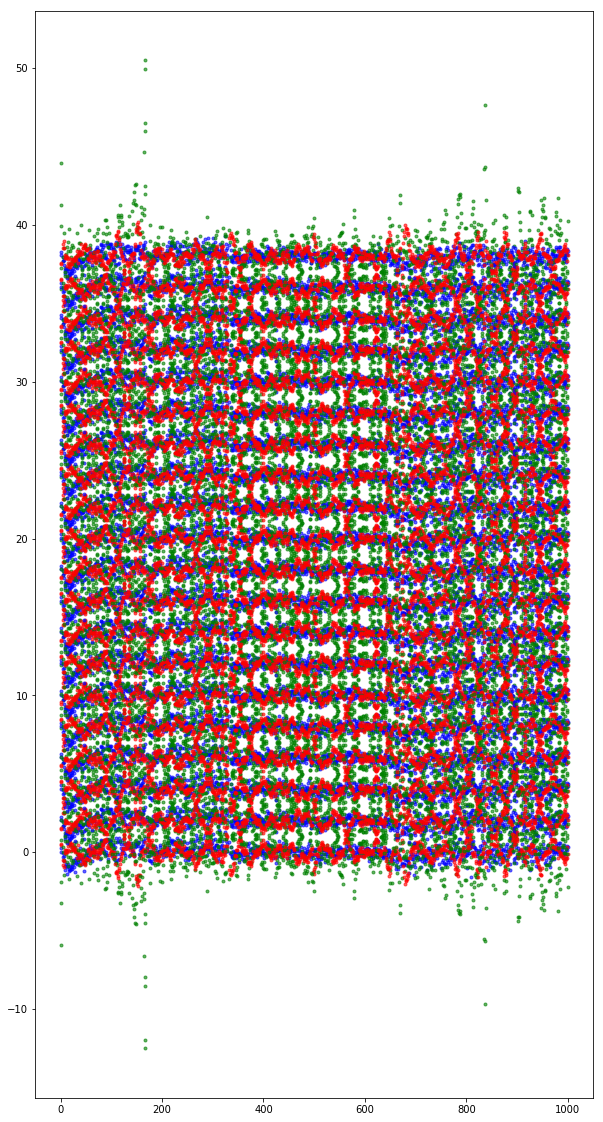

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
n=0
plt.figure(figsize=(10,20))
for gfile in glob.glob('/home/hosborn/TESS/processed_dvpdc_both/all/*view_loc.npy')[:20]:
    loc=np.load(gfile)
    lglob=np.load(gfile.replace('_loc','_glob'))
    
    plt.plot(n*2+lglob[:,1],'.b',alpha=0.6)
    plt.plot(n*2+lglob[:,2],'.g',alpha=0.6)
    plt.plot(n*2+lglob[:,0],'.r',alpha=0.6)
    n+=1

In [11]:
import pickle
dic=pickle.load(open(glob.glob('/home/hosborn/TESS/processed_dvpdc_both/all/*info.pickle')[0],'rb'))

In [8]:
#keyorder=dic.keys()
collist=['TPERIOD','TDUR','DRRATIO','NTRANS','TSNR','TDEPTH','INDUR',
         'SESMES_LOG_RATIO','PRAD_LOG_RATIO','TDUR_LOG_RATIO','RADRATIO','IMPACT',
         'TESSMAG','RADIUS','PMTOTAL','LOGG','MH','TEFF']

In [10]:
info2.keys()

dict_keys(['PRADIUS', 'IMPACT', 'TSNR', 'PMTOTAL', 'TPERIOD', 'MAXMES', 'SESMES_LOG_RATIO', 'MH', 'PRAD_LOG_RATIO', 'INDUR', 'tce_label', 'LOGG', 'TESSMAG', 'TEFF', 'RADIUS', 'MAXSES', 'NTRANS', 'RADRATIO', 'TDEPTH', 'DRRATIO', 'TDUR', 'lcsource', 'TDUR_LOG_RATIO'])

In [21]:
pickle.load(open('/home/hosborn/TESS/processed_dvpdc_both/nans/000238869406_03_99_view_info.pickle','rb'),encoding='latin1').keys()

dict_keys(['INDUR_W', 'IMPACT', 'TSNR', 'IMPACT_W', 'TSNR_W', 'TEFF_W', 'RADRATIO_W', 'tce_label', 'PMTOTAL', 'TPERIOD', 'MAXMES', 'SESMES_LOG_RATIO', 'MH', 'PRAD_LOG_RATIO', 'INDUR', 'DRRATIO_W', 'LOGG', 'NTRANS_W', 'PMTOTAL_W', 'SESMES_LOG_RATIO_W', 'LOGG_W', 'TESSMAG', 'TEFF', 'TDUR_LOG_RATIO_W', 'MH_W', 'PRADIUS', 'TPERIOD_W', 'TDUR_W', 'TDEPTH_W', 'RADIUS', 'MAXSES', 'NTRANS', 'RADRATIO', 'TDEPTH', 'DRRATIO', 'TDUR', 'lcsource', 'PRAD_LOG_RATIO_W', 'TESSMAG_W', 'RADIUS_W', 'TDUR_LOG_RATIO'])

In [16]:
fall

'/home/hosborn/TESS/processed_dvpdc_both/all/000238869406_03_99_view_info.pickle'

In [22]:
import os
import pickle
infos=glob.glob('/home/hosborn/TESS/processed_dv_101_centfixed2/all/*info.npy')
for file in infos:
    info=np.load(file,encoding='latin1')
    fall=file.replace('processed_dv_101_centfixed2','processed_dvpdc_both').replace('_info.npy','_view_info.pickle')
    if os.path.exists(fall):
        info2=pickle.load(open(fall,'rb'),encoding='latin1')
    elif os.path.exists(fall.replace('all','test')):
        info2=pickle.load(open(fall.replace('all','test'),'rb'),encoding='latin1')
    elif os.path.exists(fall.replace('all','nans')):
        info2=pickle.load(open(fall.replace('all','nans'),'rb'),encoding='latin1')
    else:
        print("NO PICKLES FOR YOU - ",fall)
        info2=None
    if info2 is not None:
        if info[6]!=info2['tce_label']:
            print("LABEL CLASH - ",info[6],info2['tce_label'])
        newinfo=np.hstack((info,np.array([info2[col+'_W'] for col in collist])))
        np.save(file.replace('.npy','2.npy'),newinfo)

In [23]:
import os
infos2=glob.glob('/home/hosborn/TESS/processed_dv_101_centfixed2/all/*info2.npy')

In [26]:
data_info=np.load(infos2[0],encoding='latin1')

In [31]:
len(np.nan_to_num(np.hstack((data_info[7:13].astype(float),data_info[-18:-6].astype(float)))))

18

In [32]:
data_info[6]

'UNK'

In [30]:
len(data_info[-18:])

18